<a href="https://colab.research.google.com/github/wave010/EDA-Python/blob/main/Data_Engineering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **dataset from Kaggle**

In [ ]:
!gdown --id 1sP8kg1gPefd8mubzUoYnRNww3guPhbm5

Downloading...
From: https://drive.google.com/uc?id=1sP8kg1gPefd8mubzUoYnRNww3guPhbm5
To: /content/Aircraft_Incident_Dataset.csv
100% 9.42M/9.42M [00:00<00:00, 29.8MB/s]


In [ ]:
data = pd.read_csv("Aircraft_Incident_Dataset.csv") #อ่านไฟล์ dataset
data.columns # ดูว่าใน dataframe มีคอลัมน์อะไรบ้าง

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Registration',
       'Aircaft_Operator', 'Aircaft_Nature', 'Incident_Category',
       'Incident_Cause(es)', 'Incident_Location', 'Aircaft_Damage_Type',
       'Date', 'Time', 'Arit', 'Aircaft_Engines', 'Onboard_Crew',
       'Onboard_Passengers', 'Onboard_Total', 'Fatalities',
       'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport',
       'Destination_Airport', 'Ground_Casualties', 'Collision_Casualties'],
      dtype='object')

In [ ]:
data.shape # ดูขนาดข้อมูล ได้ว่ามี 23519 แถว 23 คอลัมน์

(23519, 23)

In [ ]:
column = ['Date', 'Time','Arit','Aircaft_Engines', 'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport', 'Destination_Airport', 'Ground_Casualties', 'Collision_Casualties']
data = data.drop(columns=column) # เอาคอลัมน์ที่ไม่ใช้ออก

In [ ]:
data.shape #Show shape of data frame

(23519, 13)

คอลัมน์ที่ใช้
```
Ancident_Date => วันที่เกิดเหตุการณ์
Aircaft_Model => รุ่นเครื่อง
Aircaft_Registration => ทะเบียนเครื่อง
Aircaft_Operator   => ผู้ครอบครอง
Aircaft_Nature   => ชนิดเครื่อง
Incident_Category   => หมวดหมู่เหตุการณ์
Incident_Cause(es)   => สาเหตุของเหตุการณ์
Incident_Location   => สถานที่เกิดเหตุ
Aircaft_Damage_Type   => ประเภทความเสียหายของ Aircaft
Onboard_Crew   => จำนวนลูกเรือ
Onboard_Passengers  => จำนวนผู้โดยสาร
Onboard_Total  => จำนวนคนทั้งหมด
Fatalities   => ผู้เสียชีวิต

```


In [ ]:
data.isna().sum() #show total nan per column

Incident_Date              0
Aircaft_Model              0
Aircaft_Registration    1561
Aircaft_Operator           0
Aircaft_Nature             0
Incident_Category          0
Incident_Cause(es)         0
Incident_Location        932
Aircaft_Damage_Type        0
Onboard_Crew               0
Onboard_Passengers         0
Onboard_Total              0
Fatalities                 0
dtype: int64

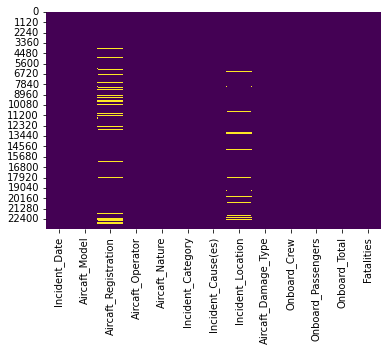

In [ ]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis') #check nan value by heatmap

In [ ]:
data[data.Aircaft_Registration.isna()] #Check nan in Aircaft_Registration

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Fatalities: 2 / Occupants: 2,Fatalities: 2 / Occupants: 2,Fatalities: 4 / Occupants: 4,4
24,29-JAN-2021,Beechcraft 100 King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Info-Unavailable,Crooked Tree...,Destroyed,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,Fatalities: 5 / Occupants: 5,Fatalities: 0 / Occupants: 0,Fatalities: 5 / Occupants: 5,5
37,21-FEB-2021,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Info-Unavailable,"San Andrés, ...",Destroyed,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23502,??-???-1923,Aeromarine 75,NaN,Aeromarine Airways,-,"other occurrence (ground fire, sabotage) | hul...",Result - Damaged on the ground,Havana harbour,Damaged beyond repair,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0
23504,31-MAR-1922,Handley Page O/7,NaN,Chinese Government,Domestic Non Scheduled Passenger,Accident | hull-loss,Info-Unavailable,near Beijing-Nany...,Damaged beyond repair,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: 14 / Occupants: 14,14
23506,15-JAN-1921,Aeromarine 75,NaN,Aeromarine Airways,-,"other occurrence (ground fire, sabotage) | hul...",Result - Damaged on the ground,Havana harbour,Damaged beyond repair,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0
23508,04-MAR-1921,Caproni Ca.60 Noviplano,NaN,Caproni,Test,Accident | hull-loss,Info-Unavailable,Lago Maggiore,Damaged beyond repair,Fatalities: 0 / Occupants: 1,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 1,0


In [ ]:
data = data[data['Aircaft_Registration'].notna()] #Drop Reg เพราะregเป็นเลขทะเบียนของแต่ละลำ

In [ ]:
data[data.Incident_Location.isna()] #Check nan in Incident_Location

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities
3555,02-MAY-2004,Yakovlev Yak-40,YV-1070CP,CIACA Airlines,Unknown,Accident | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: / Occupants:,0
3646,09-OCT-2004,Let L-410UVP,9XR-KL,El Amiron Plus,Ferry/positioning,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",NaN,Damaged beyond repair,Fatalities: 0 / Occupants: 2,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 2,0
3774,15-APR-2003,Vickers 836 Viscount,9Q-CGL,Trans Intair,Unknown,Accident | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 3,0
3789,10-MAY-2003,Antonov An-2R,UK-68038,Uzbekistan Airways,Agricultural,Accident | repairable-damage,Info-Unavailable,NaN,Substantial,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: / Occupants:,0
4329,14-NOV-2001,Cessna 208B Grand Caravan,8R-GTG,Trans Guyana Airways,Domestic Scheduled Passenger,Hijacking | repairable-damage,"Result - Hijacking - Hijacker(s) escaped, Secu...",NaN,None,Fatalities: 0 / Occupants: 1,Fatalities: 0 / Occupants: 12,Fatalities: 0 / Occupants: 13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23268,??-MAY-1936,Junkers G.31fo,D-ABIL,Reichsluftfahrtministerium,Unknown,Accident | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: / Occupants:,0
23350,23-AUG-1934,Junkers PS-5 (G.24),CCCP-L742,Dobrolet,Unknown,Accident | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: / Occupants:,0
23374,13-AUG-1933,Junkers PS-5 (G.24),CCCP-L743,Dobrolet,Unknown,occurrence unknown | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: / Occupants:,0
23463,??-OCT-1929,Farman F.63bis Goliath,F-FARI,SGTA,Unknown,occurrence unknown | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,Fatalities: / Occupants:,Fatalities: / Occupants:,Fatalities: / Occupants:,0


In [ ]:
data = data[data['Incident_Location'].notna()] #ไม่สามารถหาแหล่งข้อมูลที่อ้างอิงหรือคาดเดาได้อาจทำให้วัคถุคลาดเคลื่อน

In [ ]:
data.shape #Shape after drop nan

(21128, 13)

In [ ]:
data.drop_duplicates(subset=['Aircaft_Registration'],inplace=True) #drop duplicate data

In [ ]:
data.shape #Shape after drop duplicate

(20713, 13)

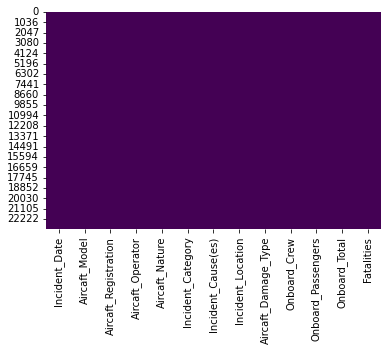

In [ ]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis') #Check nan with heat map

In [ ]:
dam = data['Aircaft_Model'].value_counts()

In [ ]:
dam

In [ ]:
data['Incident_Location'].replace('(\.\.\.)','',regex=True, inplace=True)
data['Incident_Location'].replace('(^near\s)','',regex=True, inplace=True)
data['Incident_Location'].replace('(^between\s)','',regex=True, inplace=True)
data['Incident_Location'].replace('(^within\s)','',regex=True, inplace=True)
#data['Incident_Location'].replace('(region\s)','',regex=True, inplace=True)
#data['Incident_Location'].replace('(,.{1,})','',regex=True, inplace=True)
#data['Incident_Location'].replace('(\s[A-Z][a-z])','',regex=True, inplace=True)
#data['Incident_Location'].replace('([\d])','',regex=True, inplace=True)

In [ ]:
data.drop(columns=['Onboard_Crew','Onboard_Passengers','Onboard_Total'],inplace=True)

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data['Incident_Location'].to_csv('INdata.csv')

##Add country

In [ ]:
!gdown --id 17FcDlxL9JOTr5V3nToVqeRCyYodi6vqd

Downloading...
From: https://drive.google.com/uc?id=17FcDlxL9JOTr5V3nToVqeRCyYodi6vqd
To: /content/INv3.1.csv
100% 386k/386k [00:00<00:00, 101MB/s]


In [ ]:
ct = pd.read_csv('/content/INv3.1.csv',encoding = "ISO-8859-1")
ct.columns

Index(['Unnamed: 0', 'Incident', 'Cou', 'Unnamed: 3', 'Country '], dtype='object')

In [ ]:
column = ['Unnamed: 0', 'Cou', 'Unnamed: 3']
ct = ct.drop(columns=column) # เอาคอลัมน์ที่ไม่ใช้ออก

In [ ]:
ct.rename(columns={"Incident" : "Incident_Location", 'Country ':'Country'},inplace=True)

In [ ]:
ct.shape

(11767, 2)

In [ ]:
ct[ct.Country.isna()]

In [ ]:
ct = ct[ct['Country'].notna()]

In [ ]:
ct.shape

(5453, 2)

In [ ]:
out = pd.merge(data, ct,  how='right', on=["Incident_Location"])

In [ ]:
out.shape

(7701, 11)

In [ ]:
out.notnull().sum()

Incident_Date           4660
Aircaft_Model           4660
Aircaft_Registration    4660
Aircaft_Operator        4660
Aircaft_Nature          4660
Incident_Category       4660
Incident_Cause(es)      4660
Incident_Location       7701
Aircaft_Damage_Type     4660
Fatalities              4660
Country                 7701
dtype: int64

In [ ]:
# out = out[out['Country'].notna()]

In [ ]:
# out.dropna(subset=['Country'])

In [ ]:
out

In [ ]:
#out.isnull().sum()

In [ ]:
out[out.Incident_Location.isna()] #Check nan in Incident_Location

In [ ]:
kag=out.dropna()

In [ ]:
kag.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Fatalities,Country
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Venetia Mine,Substantial,0.0,South Africa
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah,Substantial,0.0,Iran
3,18-NOV-2009,Fokker 100,EP-CFO,Iran Air,Domestic Scheduled Passenger,Accident | repairable-damage,Info-Unavailable,Isfahan-Shah,Substantial,0.0,Iran
4,05-JAN-1998,Fokker 100,EP-IDC,Iran Air,Domestic Scheduled Passenger,Accident | hull-loss,Info-Unavailable,Isfahan-Shah,Substantial,0.0,Iran
5,05-JAN-1995,Lockheed L-1329-25 JetStar II,1003,Iran AF,Military,Accident | hull-loss,Info-Unavailable,Isfahan-Shah,Damaged beyond repair,12.0,Iran


In [ ]:
#export kag 
kag.to_csv('kaggle_data.csv')

# **Web scraping from wiki**

url = https://en.wikipedia.org/wiki/List_of_accidents_and_incidents_involving_commercial_aircraft

In [ ]:
from bs4 import BeautifulSoup
import requests 

url = 'https://en.wikipedia.org/wiki/List_of_accidents_and_incidents_involving_commercial_aircraft' #url ที่ใช้ในการ scraping 
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
result = requests.get(url, headers = headers) # get request
html_doc = result.text #เปลี่ยนเป็น text
soup = BeautifulSoup(html_doc, features='html.parser') #ทำ text เป็นไฟล์ html
#print(soup)

In [ ]:
import pandas as pd
web_data = pd.DataFrame(columns=["detail"]) #สร้าง dataFrame มาเพื่อเก็บข้อมูลจากการ Web scraping 

In [ ]:
col = ['detail'] # list เก็บชื่อ column ของ web_data
for item in soup.find_all('li'): #ดึงข้อความ
  #print(item.text[:])
  data_item =[[item.text[:]]] #สร้าง list เก็บข้อความ
  new_df = pd.DataFrame(data=data_item, columns=col) #สร้าง dataFrame ขึ้นมาใหม่
  web_data = web_data.append(new_df) #เพิ่มแถวให้กับ web_data
  if "Grodno Aviakompania Flight 1252" in item.text:
    break

In [ ]:
web_data = web_data.reset_index() #รีเซ็ท index
web_data = web_data.drop(columns=["index"]) # drop columns
web_data

,detail
0,July 21 – The Goodyear dirigible Wingfoot Air ...
1,"August 2 – A Caproni Ca.48 crashes at Verona, ..."
2,December 14 – A Handley Page O/400 hits a tree...
3,"April 7 – In the Picardie mid-air collision, a..."
4,May 14 – An Air Union Farman F.60 Goliath cras...
...,...
1401,July 6 – Petropavlovsk-Kamchatsky Air Enterpri...
1402,"July 16 – Siberian Light Aviation Flight 42, a..."
1403,September 12 – Siberian Light Aviation Flight ...
1404,"October 19 – In the 2021 Houston MD-87 crash, ..."


In [ ]:
web_data['date'] = web_data['detail'].str.extract('(^[A-z]{1}[a-z]{2,}\s\d{1,2}\s)') #เพิ่มคอลัมน์ date เอาข้อมูลจากคอลัมน์ detail
web_data['detail'].replace('(^[A-z]{1}[a-z]{2,}\s\d{1,2}\s)','',regex=True, inplace=True)
web_data.dropna(subset=['date'], inplace=True) #ดรอปแถวที่ไม่สามรถแยกวันที่ออกมาได้

web_data = web_data.reset_index() #รีเซ็ท index
web_data = web_data.drop(columns=["index"]) # drop columns

#สร้างคอลัมน์ Title
web_data['Title'] = web_data['detail'].str.extract('(,.{3,}\.)')
web_data = web_data.rename(columns = {'detail':'Title','Title':'detail'}) 
web_data['Title'].replace('(,.{3,}\.)','',regex=True, inplace=True)
web_data['Title'].replace('(^.\s)','',regex=True, inplace=True)
web_data['detail'].replace('(^,\s)','',regex=True, inplace=True)

In [ ]:
#โหลดไฟล์ xlsx ที่ใช้เก็บปีของ web-scrap เพื่อนำไปใช้ใน web_data
!gdown --id 1QgVqOYNmcIYv36sS-hZFiI8bSfy6ikdM

Downloading...
From: https://drive.google.com/uc?id=1QgVqOYNmcIYv36sS-hZFiI8bSfy6ikdM
To: /content/year.xlsx
100% 11.6k/11.6k [00:00<00:00, 4.69MB/s]


In [ ]:
year = pd.read_excel("year.xlsx")
year = year.drop(columns=['Unnamed: 0'])
#year.head()

In [ ]:
import numpy as np
#สร้างคอลัมน์ year ให้กับ web_data 
for idx,row in year.iterrows():
  start = row.start
  end = row.end
  year = row.year
  if start == end :
    web_data.loc[[start],'Year'] = year
  else:
    web_data.loc[np.arange(start,end+1),'Year'] = year

In [ ]:
web_data = web_data[['Title','date','Year','detail']] #เรียงคอลัมน์ใหม่

In [ ]:
#สร้าง col2
web_data["Col2"] =web_data['detail'].str.extract('(,.{3,}\.)')
web_data = web_data.rename(columns = {'detail':'Col2','Col2':'detail'}) 
web_data['Col2'].replace('(,.{3,}\.)','',regex=True, inplace=True)
web_data['detail'].replace('(^,\s)','',regex=True, inplace=True)
#สร้าง col3
web_data["Col3"] =web_data['detail'].str.extract('(,.{3,}\.)')
web_data = web_data.rename(columns = {'detail':'Col3','Col3':'detail'}) 
web_data['Col3'].replace('(,.{3,}\.)','',regex=True, inplace=True)
web_data['detail'].replace('(^,\s)','',regex=True, inplace=True)
#สร้าง col4
web_data["Col4"] =web_data['detail'].str.extract('(,.{3,}\.)')
web_data = web_data.rename(columns = {'detail':'Col4','Col4':'Col5'}) 
web_data['Col4'].replace('(,.{3,}\.)','',regex=True, inplace=True)
web_data['Col5'].replace('(^,\s)','',regex=True, inplace=True)

web_data

,Title,date,Year,Col2,Col3,Col4,Col5
0,The Goodyear dirigible Wingfoot Air Express ca...,July 21,1919.0,Illinois,while carrying passengers to a local amusement...,killing thirteen people: three out of the five...,with 27 others on the ground being injured.
1,A Caproni Ca.48 crashes at Verona,August 2,1919.0,Italy,during a flight from Venice to Taliedo,Milan,"killing all on board (14, 15, or 17 people, ac..."
2,A Handley Page O/400 hits a tree and crashes a...,December 14,1920.0,London,after failing to gain height following takeoff,killing four out of eight on board.,NaN
3,In the Picardie mid-air collision,April 7,1922.0,a de Havilland DH.18A,G-EAWO,operated by Daimler Hire Ltd.,"collides with a Farman F.60 Goliath, F-GEAD, o..."
4,An Air Union Farman F.60 Goliath crashes near ...,May 14,1923.0,Somme,France,due to the structural failure of a wing,killing all six on board.
...,...,...,...,...,...,...,...
1397,Petropavlovsk-Kamchatsky Air Enterprise Flight...,July 6,2021.0,an Antonov An-26 operating a domestic flight f...,Russia,crashes on approach. All 22 passengers and 6 c...,NaN
1398,Siberian Light Aviation Flight 42,July 16,2021.0,an Antonov An-28 operating a domestic flight f...,Russia,makes a crash landing after takeoff,injuring 11 of the 18 passengers and crew on b...
1399,Siberian Light Aviation Flight 51,September 12,2021.0,a Let L-410 operating a domestic flight from I...,Russia,crashes in a forest short of the runway while ...,NaN
1400,In the 2021 Houston MD-87 crash,October 19,2021.0,a McDonnell Douglas MD-87 aircraft crashes on ...,Houston,Texas. All 21 people on board survive.,NaN


In [ ]:
web_data.to_csv("web_data.csv") # บันทึกไฟล์ Dataframe

# **Clean data from web scraping Part 1**

In [ ]:
!gdown --id 12d2evZRGnG6zBxoEfd0cofeuamw5-jt9

Downloading...
From: https://drive.google.com/uc?id=12d2evZRGnG6zBxoEfd0cofeuamw5-jt9
To: /content/web_data.csv
100% 307k/307k [00:00<00:00, 96.2MB/s]


In [ ]:
import pandas as pd
web_data = pd.read_csv("web_data.csv") # อ่านไฟล์ใหม่อีกครั้ง

เป็นการสกัดข้อมูลโดยใช้ Regular Expression

**จัดการกับ Column Col2**

In [ ]:
#ดึงชื่อรุ่นของเครื่องบินออกจาก col2
web_data["Aircaft_Model1"] =web_data['Col2'].str.extract('(^an*\s[A-Z]{1}.{1,}\d[A-Z]*)')
web_data['Col2'].replace('(^an*\s[A-Z]{1}.{1,}\d[A-Z]*)','',regex=True, inplace=True)
web_data["Aircaft_Model2"] =web_data['Col2'].str.extract('(^a\sde\s.{1,}[1-9]*[A-Z]*)')
web_data['Col2'].replace('(^a\sde\s.{1,}[1-9]*[A-Z]*)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col2
web_data['Col2'].replace('(^\soperating.{1,})','',regex=True, inplace=True)
web_data['Col2'].replace('(^\sflying.{1,})','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sen.{1,}|^\sbound.{1,}|^\son\sboard$|^\speople\son\sboard$))','',regex=True, inplace=True)

#สร้าง columns ชื่อ cash_Col2 เอาข้อมูลจาก Col2
web_data['cash_Col2'] = web_data['Col2'].str.extract('(crashes.{1,})') 
web_data['Col2'].replace('(crashes.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col2
web_data['Col2'].replace('((^disappears.{1,}|^\sLodestar|^\sConstellation))','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model3 เอาข้อมูลจาก Col2
web_data["Aircaft_Model3"] =web_data['Col2'].str.extract('(^a.{1,})') 
web_data['Col2'].replace('(^a.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col2
web_data['Col2'].replace('((^\sSuper.{1,}|^Southern.{1,}|including.{1,}|\sdisappears))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sinbound.{1,}|^while.{1,};))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sai.{1,}|^\son.{1,}|^\sViking|^\sSkymaster|^\snick.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^while.{1,}|^when.{1,};|\sTurbolet|^\sCaravan|^\scargo.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sElectr.{1,}|^\sTwin.{1,}|^\sfre.{1,}|^\sis.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\/Adv|^\sover.{1,}|.{1,}km\)|Pennsylvani.{1,}|operating.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sat.{1,}|^\sBig.{1,}|^\sTur.{1,}|^\sskids.{1,}|^\sbuilt.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sfails.{1,}|^between.{1,}|^\sCP.{1,}|\sModifie.{1,}|^\sen.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('(^\sa\sSilk\sWay\sAirlines\s)','',regex=True, inplace=True)
web_data['Col2'].replace('(^when.{1,}|^\stha.{1,}|^en.{1,}|^\stransporting.{1,}|^\soperated.{1,})','',regex=True, inplace=True)
web_data['Col2'].replace('((^\speople$|^\shelicopter|^\sre.{1,}|^\scollides.{1,}|^pos.{1,}|\sFriendship))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sseries|^\sIslander|^which|\sleased.{1,}|\sturboprop|^\sFellowship))','',regex=True, inplace=True)
web_data['Col2'].replace('((^re.{1,};|F-BBDM|only.{1,}|\sfrom.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^\sStratocruiser|^\sditches.{1,}|^Malta.{1,}|\sArgonaut\s|\sFreighter.{1,}|^\sViscount|^Russia\sdue.{1,}|^\sCommando|\sSkytrain))','',regex=True, inplace=True)
web_data['Col2'].replace('((^.{1,}Airway.{1,}|Strand|\spropliner|\sdestined.{1,}|^.{1,}soldiers.{1,}|^.{1,}Airlines.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((but.{1,}|\sstalls\sand\s|^\sflight|^\sprototype|^\sCaravelle|^two.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((^due.{1,};|.{1,}flying|shortly.{1,}|.{1,}Flight.{1,}|\swas.{1,}|Morocco.{1,};|\sNomad\s|\sTristar\s|.{1,}team.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((\sTristar|\sTriStar|\sdeparting|Venezuela.{1,};|.{1,}Army.{1,}|the\sFokker.{1,};|\sLockheed.{1,};|^in.{1,}|^\sas.{1,}))','',regex=True, inplace=True)
web_data['Col2'].replace('((Boeing.{1,}|^nine.{1,}|\sChinook\s|\sStratofreighter\s|\sAdvanced|^\ssuffers.{1,}|involving.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model4 เอาข้อมูลจาก Col2
web_data["Aircaft_Model4"] =web_data['Col2'].str.extract('(^the.{1,})') 
web_data['Col2'].replace('(^the.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model5 เอาข้อมูลจาก Col2
web_data["Aircaft_Model5"] =web_data['Col2'].str.extract('(.{1,}Metro.{1,})') 
web_data['Col2'].replace('(.{1,}Metro.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model6 เอาข้อมูลจาก Col2
web_data["Aircaft_Model6"] =web_data['Col2'].str.extract('(Anto.{1,})') 
web_data['Col2'].replace('(Anto.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col2
web_data['Col2'].replace('((^\scrash.{1,}|^\screw.{1,}|^\sone.{1,}|.{1,}poor.{1,}\.))','',regex=True, inplace=True)

#สร้าง columns ชื่อ Fatalities เอาข้อมูลจาก Col2
web_data["Fatalities1"] =web_data['Col2'].str.extract('(killing.{1,})') 
web_data['Col2'].replace('(killing.{1,})','',regex=True, inplace=True)

web_data["Fatalities2"] =web_data['Col2'].str.extract('(all\s[0-9]{1,}.{1,})') 
web_data['Col2'].replace('(all\s[0-9]{1,}.{1,})','',regex=True, inplace=True)

web_data["Fatalities3"] =web_data['Col2'].str.extract('(\s[0-9]{2}.{1,})') 
web_data['Col2'].replace('(\s[0-9]{2}.{1,})','',regex=True, inplace=True)

web_data["Fatalities4"] =web_data['Col2'].str.extract('(all.{1,}killed)') 
web_data['Col2'].replace('(all.{1,}killed)','',regex=True, inplace=True)

web_data["Fatalities5"] =web_data['Col2'].str.extract('(All.{1,}killed)') 
web_data['Col2'].replace('(All.{1,}killed)','',regex=True, inplace=True)

web_data["Fatalities6"] =web_data['Col2'].str.extract('(pass.{1,})') 
web_data['Col2'].replace('(pass.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col2
web_data['Col2'].replace('((people.{1,}|\sof\sthe$|\sWith.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ country_city เอาข้อมูลจาก Col2
web_data["country_city_Col2"] =web_data['Col2'].str.extract('([a-zA-Z].{1,})') 
web_data['Col2'].replace('([a-zA-Z].{1,})','',regex=True, inplace=True)

#สร้าง column ชื่อ Aircaft_Model_Col2 โดยใช้ column Aircaft_Model1+....+Aircaft_Model6
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Aircaft_Model_Col2'] = str(row.Aircaft_Model1) +","+str(row.Aircaft_Model2)+","+str(row.Aircaft_Model3) +","+str(row.Aircaft_Model4) +","+str(row.Aircaft_Model5) +","+str(row.Aircaft_Model6)
#ลบข้อความที่ไม่จำเป็นออกใน Aircaft_Model_Col2
web_data['Aircaft_Model_Col2'].replace('((,|nan))','',regex=True, inplace=True)

#สร้าง column ชื่อ Fatalities_Col2 โดยใช้ column Fatalitiesl1+....+Fatalities6
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Fatalities_Col2'] = str(row.Fatalities1) +","+str(row.Fatalities2)+","+str(row.Fatalities3) +","+str(row.Fatalities4) +","+str(row.Fatalities5) +","+str(row.Fatalities6)
#ลบข้อความที่ไม่จำเป็นออกใน Fatalities_Col2
web_data['Fatalities_Col2'].replace('((,|nan))','',regex=True, inplace=True)

# drop columns
web_data = web_data.drop(columns=[ 'Col2','Aircaft_Model1', 'Aircaft_Model2','Aircaft_Model3','Aircaft_Model4', 'Aircaft_Model5', 'Aircaft_Model6', 'Fatalities1','Fatalities2', 'Fatalities3', 'Fatalities4', 'Fatalities5','Fatalities6']) 

# drop columns
web_data = web_data.drop(columns=[ 'Unnamed: 0',]) 

In [ ]:
web_data

**จัดการกับ Column Col3**

In [ ]:
#สร้าง columns ชื่อ crash_col3เอาข้อมูลจาก Col3
web_data["crash_col3"] =web_data['Col3'].str.extract('(^crashes.{1,})') 
web_data['Col3'].replace('(^crashes.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col3
web_data['Col3'].replace('((^sca.{1,}|^skids.{1,};|^flying.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((^while.{1,}|^during.{1,}rm|^after.{1,};|^overshoots.{1,};))','',regex=True, inplace=True) 
web_data['Col3'].replace('((^durin.{1,}|^after.{1,}|^with.{1,}\.))','',regex=True, inplace=True) 

#สร้าง columns ชื่อ kill1_col3เอาข้อมูลจาก Col3
web_data["kill1_col3"] =web_data['Col3'].str.extract('(killing.{1,}board\.)') 
web_data['Col3'].replace('(killing.{1,}board\.)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill2_col3เอาข้อมูลจาก Col3
web_data["kill2_col3"] =web_data['Col3'].str.extract('(killing.{1,})') 
web_data['Col3'].replace('(killing.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill3_col3เอาข้อมูลจาก Col3
web_data["kill3_col3"] =web_data['Col3'].str.extract('(kills.{1,})') 
web_data['Col3'].replace('(kills.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill4_col3เอาข้อมูลจาก Col3
web_data["kill4_col3"] =web_data['Col3'].str.extract('(All\s[0-9].{1,})') 
web_data['Col3'].replace('(All\s[0-9].{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col3
web_data['Col3'].replace('((^due.{1,}|^Pennsylvani.{1,}|^explo.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('(^stalls.{1,})','',regex=True, inplace=True)
web_data['Col3'].replace('((^makes.{1,}|^loses.{1,};))','',regex=True, inplace=True)
web_data['Col3'].replace('((^en.{1,};|^los.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('(.{1,}Airport.{1,};)','',regex=True, inplace=True)
web_data['Col3'].replace('((^disappears.{1,}|^is.{1,};|^breaks.{1,}|the aircraft.{1,};))','',regex=True, inplace=True)
web_data['Col3'].replace('((^collides.{1,};|^\sfollowing.{1,}|^en.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((^with a.{1,}|^to.{1,}|collides.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((^England\sand.{1,}|only.{1,}|.{1,}due\sto.{1,};|^on.{1,}|^at.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((.{1,}due\sto.{1,}|flies.{1,}|suffers.{1,}|disintegrates.{1,}|ditches.{1,};))','',regex=True, inplace=True)
web_data['Col3'].replace('((;.{1,}to\s.{1,}|ditches.{1,}|^is.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('(.{1,}\sto\s.{1,})','',regex=True, inplace=True)
web_data['Col3'].replace('((.{1,}Lock.{1,}|^sh.{1,}|.{1,}Airport.{1,}|.{1,}run.{1,}|^\sduring.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((.{1,}rescued.{1,}|collide.{1,}\.|.{1,}loss.{1,20}\.|carrying.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((\sin\sthe.{1,}|^abruptly.{1,}|via.{1,}|^over.{1,}|for\sreasons\sunknown.|striking.{1,}\.))','',regex=True, inplace=True)
web_data['Col3'].replace('((^\sthe.{1,}|.{1,}Flight.{1,}|strays.{1,}|.{1,}bomb.{1,}|^experiences.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((^for.{1,}|.{1,}failed.{1,}|operated.{1,}|.{1,}while.{1,}|.{1,}troops.{1,}|.after.{1,}|goes.{1,}|how.{1,}|allegedly.{1,};|run.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((performs.{1,}|;.{1,}survive.{1,}|rupturing.{1,}|\sno\s.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((.{1,}survive.{1,}|hits.{1,};|catches.{1,}over\s))','',regex=True, inplace=True)
web_data['Col3'].replace('((.{1,}including.{1,}|\sIt\sis\sunknown\s|landing.{1,}|hits.{1,}t.|^freighter|^strikes.{1,}|.{1,}following.{1,}\.|leave.{1,}|^as\s.{1,}|.{1,}disappears.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((.{1,}evacuated.{1,}|.{1,}occupied.{1,}|.{1,}damaged|coming.{1,}|.{1,}takeoff.{1,}|10\sminutes))','',regex=True, inplace=True)
web_data['Col3'].replace('(( Both crew member.{1,}|from.{1,}|.{1,}escape.{1,}|crash-lands.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((with.{1,}|a\sBoeing\s.{1,}|.{1,}crash.{1,}|crash.{1,}|accidentally.{1,}|bursts.{1,}|.{1,}during.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('((^\s|^and|\samid.{1,}conditions|a\spassenger|ruptures.{1,}))','',regex=True, inplace=True)
web_data['Col3'].replace('(a\sVickers\sViscount)','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model1 เอาข้อมูลจาก Col3
web_data["Aircaft_Model1"] =web_data['Col3'].str.extract('(G-EAWO)') 
web_data['Col3'].replace('(G-EAWO)','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model2 เอาข้อมูลจาก Col3
web_data["Aircaft_Model2"] =web_data['Col3'].str.extract('(^a\s.{1,})') 
web_data['Col3'].replace('(^a\s.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model3 เอาข้อมูลจาก Col3
web_data["Aircaft_Model3"] =web_data['Col3'].str.extract('(^an\s[A-Z].{1,})') 
web_data['Col3'].replace('(^an\s[A-Z].{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ Aircaft_Model4 เอาข้อมูลจาก Col3
web_data["Aircaft_Model4"] =web_data['Col3'].str.extract('(^\san\sUS.{1,}ner\s)') 
web_data['Col3'].replace('(^\san\sUS.{1,}ner\s)','',regex=True, inplace=True)

#สร้าง column ชื่อ Aircaft_Model_Col3 โดยใช้ column Aircaft_Model1+....+Aircaft_Model6
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Aircaft_Model_Col3'] = str(row.Aircaft_Model1) +","+str(row.Aircaft_Model2)+","+str(row.Aircaft_Model3) +","+str(row.Aircaft_Model4)
#ลบข้อความที่ไม่จำเป็นออกใน Aircaft_Model_Col2
web_data['Aircaft_Model_Col3'].replace('((,|nan))','',regex=True, inplace=True)
# drop columns
web_data = web_data.drop(columns=[ 'Aircaft_Model1', 'Aircaft_Model2','Aircaft_Model3','Aircaft_Model4']) 

#สร้าง columns ชื่อ kill5_col3เอาข้อมูลจาก Col3
web_data["kill5_col3"] =web_data['Col3'].str.extract('(all.{1,})') 
web_data['Col3'].replace('(all.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill6_col3เอาข้อมูลจาก Col3
web_data["kill6_col3"] =web_data['Col3'].str.extract('(All.{1,})') 
web_data['Col3'].replace('(All.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col3
web_data['Col3'].replace('(\sOf.{1,})','',regex=True, inplace=True) 
#สร้าง columns ชื่อ kill7_col3เอาข้อมูลจาก Col3
web_data["kill7_col3"] =web_data['Col3'].str.extract('(.wo.{1,})') 
web_data['Col3'].replace('(.wo.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill8_col3เอาข้อมูลจาก Col3
web_data["kill8_col3"] =web_data['Col3'].str.extract('(.hree.{1,})') 
web_data['Col3'].replace('(.hree.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill9_col3เอาข้อมูลจาก Col3
web_data["kill9_col3"] =web_data['Col3'].str.extract('([Ff]our.{1,})') 
web_data['Col3'].replace('([Ff]our.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill10_col3เอาข้อมูลจาก Col3
web_data["kill10_col3"] =web_data['Col3'].str.extract('(Five.{1,})') 
web_data['Col3'].replace('(Five.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col3
web_data['Col3'].replace('((of.{1,}board$|Both.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill11_col3เอาข้อมูลจาก Col3
web_data["kill11_col3"] =web_data['Col3'].str.extract('([Ss]ix.{1,})') 
web_data['Col3'].replace('([Ss]ix.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill12_col3เอาข้อมูลจาก Col3
web_data["kill12_col3"] =web_data['Col3'].str.extract('([1-9].{1,})') 
web_data['Col3'].replace('([1-9].{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill13_col3เอาข้อมูลจาก Col3
web_data["kill13_col3"] =web_data['Col3'].str.extract('(The.{1,})') 
web_data['Col3'].replace('(The.{1,})','',regex=True, inplace=True)

#สร้าง column ชื่อ Fatalities_Col3 โดยใช้ column  'kill1_col3', 'kill2_col3', 'kill3_col3', 'kill4_col3','kill5_col3', 'kill6_col3', 'kill7_col3', 'kill8_col3', 'kill9_col3', 'kill10_col3', 'kill11_col3', 'kill12_col3', 'kill13_col3'
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Fatalities_Col3'] = str(row.kill1_col3) +","+ str(row.kill2_col3) +","+ str(row.kill3_col3) +","+ str(row.kill4_col3) +","+ str(row.kill5_col3) +","+ str(row.kill6_col3) +","+ str(row.kill7_col3) +"," + str(row.kill8_col3) +","+ str(row.kill9_col3) +","+ str(row.kill10_col3) +","+ str(row.kill11_col3) +","+ str(row.kill12_col3) +","+ str(row.kill13_col3) 
#ลบข้อความที่ไม่จำเป็นออกใน Fatalities_Col3
web_data['Fatalities_Col3'].replace('((,|nan))','',regex=True, inplace=True)
# drop columns
web_data = web_data.drop(columns=['kill1_col3', 'kill2_col3', 'kill3_col3', 'kill4_col3','kill5_col3', 'kill6_col3', 'kill7_col3', 'kill8_col3', 'kill9_col3', 'kill10_col3', 'kill11_col3', 'kill12_col3', 'kill13_col3']) 

#สร้าง columns ชื่อ country_city เอาข้อมูลจาก Col3
web_data["country_city_Col3"] =web_data['Col3'].str.extract('(.{4,})') 
web_data['Col3'].replace('(.{4,})','',regex=True, inplace=True)
#drop columns
web_data = web_data.drop(columns=['Col3'])

In [ ]:
web_data

**จัดการกับ Column Col4**

In [ ]:
#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((^due\sto.{1,};|^while.{1,}|^to.{1,};|;.{1,}released.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((^due\sto.{1,}|^to.{1,}|^after.{1,};|.{1,}following.{1,};))','',regex=True, inplace=True)
web_data['Col4'].replace('((^after.{1,}|.{1,}following.{1,}|^operated.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('(([in\s]*the\scrash.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((following.{1,};|^en\sroute.{1,}\.|.{1,}aircraft;))','',regex=True, inplace=True)
web_data['Col4'].replace('((following.{1,}|^en\sroute.{1,}|all.{1,}survive.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('(;.{1,}survive.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill1 เอาข้อมูลจาก Col4
web_data["kill1"] =web_data['Col4'].str.extract('(^killing.{1,})') 
web_data['Col4'].replace('(^killing.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((on\simpact.{1,}|of\sthe.{1,}board$))','',regex=True, inplace=True)
web_data['Col4'].replace('((^crashes.{1,};|as\swell.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((.{1,}about.{1,}|about.{1,}|overshoots.{1,}|\sit\sis.{1,}|shortly.{1,}|.{1,}shortly.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((All\s.{1,}surviv.{1,}|.{1,}while.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill2 เอาข้อมูลจาก Col4
web_data["kill2"] =web_data['Col4'].str.extract('(All.{1,}killed.)') 
web_data['Col4'].replace('(All.{1,}killed.)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((;.{1,}injured|\snone\sof\sthe\s))','',regex=True, inplace=True)
web_data['Col4'].replace('(\..{1,}injure.{1,})','',regex=True, inplace=True)
web_data['Col4'].replace('(.{1,}injure.{1,})','',regex=True, inplace=True)
web_data['Col4'].replace('((skidding.{1,};|makes.{1,}|.{1,}operating.{1,}|^crashes.{1,}|including.{1,}|and\sis\sflown.{1,}|and\scrashes.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((the\sair.{1,}|^\s))','',regex=True, inplace=True)
web_data['Col4'].replace('((whil.{1,}|.{1,}engine.{1,};))','',regex=True, inplace=True)
web_data['Col4'].replace('((.{1,}engine.{1,}|where.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill3 เอาข้อมูลจาก Col4
web_data["kill3"] =web_data['Col4'].str.extract('(all.{1,}killed)') 
web_data['Col4'].replace('(all.{1,}killed)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((^but.{1,}|^\.|^\s))','',regex=True, inplace=True)
web_data['Col4'].replace('((.{1,}\sto\s.{1,};|.{1,}after.{1,};|when.{1,}|\sThe\splane.{1,}|is\sshot\sdown.{1,};|though.{1,}|.{1,}Despite.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((injuring.{1,}|\(.{1,}|\sOf\sthe.{1,}board|^\.|^\s))','',regex=True, inplace=True)
web_data['Col4'].replace('((.{1,}due\sto.{1,}|collides.{1,}|in\sRussia.{1,}|suffers.{1,};|on\sthe\sTête\s.{1,};))','',regex=True, inplace=True)
web_data['Col4'].replace('((suffers.{1,}|\sthe\sDHC-2.{1,}|[1-9].{1,}injuries.|resulting.{1,}))','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((^a\scrash.{1,}|disappears.{1,}|^Air.{1,}|\)|.{1,}minutes.{1,}|.{1,}into.{1,}\.|.{1,}during.{1,};|in poor weather.|^and.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((into.{1,}|over.{1,}|\sthe\sblade.{1,}|after.{1,}or.|leadin.{1,}|four-year.{1,}|Jordan\..{1,}|who.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((\sof\sthe.{1,}aircraft$|colli.{1,};|\sin\sJapan.{1,}|loses.{1,}|^only.{1,}|claiming.{1,}|\sa\stwo\syear.{1,}|MO$|then\sbreaks.{1,};|in\sthe\sfirst.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((\sthere\sis.{1,}|all.{1,}der.|The\sfour\screw\smembers\sand\s35.{1,}|causing.{1,}|.{1,}cliff.|and\sone$|.{1,}to.{1,};|.{1,}survives.|^then.{1,};))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill4 เอาข้อมูลจาก Col4
web_data["kill4"] =web_data['Col4'].str.extract('(all.{1,}die)') 
web_data['Col4'].replace('(all.{1,}die)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((^two.{1,}rs|this.{1,}|all.{1,}ve|in.{1,}\sworst\s.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((.{1,}\sto\s.{1,}|breaks.{1,}|^a.{1,}|\sfor\sreasons\sunknown|second.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((of carbon.{1,}|bre.{1,}|.{1,}survive.|^on\s.{1,}|the\sothers.{1,}|followed.{1,}|^is.{1,}|^for.{1,}|.{1,}uring.{1,}|the\sEmbraer.{1,}|Hijacker\sis.{1,}|^kills\s$))','',regex=True, inplace=True)
web_data['Col4'].replace('((;.{1,}with.{1,}|.{1,}Flight.{1,}|\sin\sthe\saccident.|.{1,}released.{1,}|in\sthe\sdeadliest.{1,}|.{1,}rash.{1,}|^via.{1,}|.{1,}captured|^giving.{1,}|^if\sany))','',regex=True, inplace=True)

#เปลี่ยยนเลขที่เป็น string
web_data['Col4'].replace('(two\s)','2 ',regex=True, inplace=True)
web_data['Col4'].replace('(three\s)','3 ',regex=True, inplace=True)
web_data['Col4'].replace('(four\s)','4 ',regex=True, inplace=True)
web_data['Col4'].replace('(five\s)','5 ',regex=True, inplace=True)
web_data['Col4'].replace('(Seven\s)','7 ',regex=True, inplace=True)
web_data['Col4'].replace('(eight\s)','8 ',regex=True, inplace=True)
web_data['Col4'].replace('(one\s)','1 ',regex=True, inplace=True)

#สร้าง columns ชื่อ kill5 เอาข้อมูลจาก Col4
web_data["kill5"] =web_data['Col4'].str.extract('(killing.{1,})') 
web_data['Col4'].replace('(killing.{1,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill6 เอาข้อมูลจาก Col4
web_data["kill6"] =web_data['Col4'].str.extract('([1-9].{1,}killed)') 
web_data['Col4'].replace('([1-9].{1,}killed)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill7 เอาข้อมูลจาก Col4
web_data["kill7"] =web_data['Col4'].str.extract('([1-9].{1,}die)') 
web_data['Col4'].replace('([1-9].{1,}die)','',regex=True, inplace=True)

In [ ]:
#สร้าง column ชื่อ Fatalities_Col4 โดยใช้ column  kill1-kill7
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Fatalities_Col4'] = str(row.kill1) +","+ str(row.kill2) +","+ str(row.kill3) +","+ str(row.kill4) +","+ str(row.kill5) +","+ str(row.kill6) +","+ str(row.kill7) 
#ลบข้อความที่ไม่จำเป็นออกใน Fatalities_Col4
web_data['Fatalities_Col4'].replace('((,|nan))','',regex=True, inplace=True)
# drop columns
web_data = web_data.drop(columns=['kill1', 'kill2', 'kill3', 'kill4','kill5', 'kill6', 'kill7']) 

#ลบข้อความที่ไม่จำเป็นออกใน Col4
web_data['Col4'].replace('((All\s.{1,}|All|\sThe\s707.{1,}|^the.{1,}|flies.{1,}|catching.{1,}))','',regex=True, inplace=True)
web_data['Col4'].replace('((^in|^of.{1,}|\sOf.{1,}|of\sthe.{1,}crew|East Berlin.{1,}|\sThe\screw.{1,}|because.{1,}|After.{1,}|plowing.{1,}|\sthe\screw\s))','',regex=True, inplace=True)
web_data['Col4'].replace('((\sall.{1,}|[1-9].{1,}|kill.{1,}|by\sa\spassenger|bound.{1,}|upon.{1,}|with\s))','',regex=True, inplace=True)
web_data['Col4'].replace('((\.|;))','',regex=True, inplace=True)

#สร้าง columns ชื่อ country1_city เอาข้อมูลจาก Col4
web_data["country1_city_Col4"] =web_data['Col4'].str.extract('(.{4,})') 
web_data['Col4'].replace('(.{4,})','',regex=True, inplace=True)

#สร้าง columns ชื่อ country2_city เอาข้อมูลจาก Col4
web_data["country2_city_Col4"] =web_data['Col4'].str.extract('(UK)') 
web_data['Col4'].replace('(UK)','',regex=True, inplace=True)

#สร้าง column ชื่อ country_city_Col4 โดยใช้ column  country1_city_Col4 + country2_city_Col4
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'country_city_Col4'] = str(row.country1_city_Col4) +","+ str(row.country2_city_Col4)  
#ลบข้อความที่ไม่จำเป็นออกใน country_city_Col4 
web_data['country_city_Col4'].replace('((,|nan))','',regex=True, inplace=True)
# drop columns
web_data = web_data.drop(columns=['country1_city_Col4','country2_city_Col4']) 

#drop columns
web_data = web_data.drop(columns=['Col4'])

In [ ]:
web_data

**จัดการกับ Column Col5**

In [ ]:
#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((due\sto.{1,};))','',regex=True, inplace=True)
web_data['Col5'].replace('(due\sto.{1,}r,)','',regex=True, inplace=True)
web_data['Col5'].replace('(due\sto.{1,},)','',regex=True, inplace=True)
web_data['Col5'].replace('(due\sto.{1,}ms.)','',regex=True, inplace=True)
web_data['Col5'].replace('(due\sto.{1,})','',regex=True, inplace=True)

web_data['Col5'].replace('(^with.{1,},)','',regex=True, inplace=True)
web_data['Col5'].replace('(^with.{1,};)','',regex=True, inplace=True)
web_data['Col5'].replace('(^with.{1,}on.)','',regex=True, inplace=True)
web_data['Col5'].replace('(^with.{1,})','',regex=True, inplace=True)

web_data['Col5'].replace('(^the.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('((^collides.{1,}ie,|^and\scon.{1,},|This\sis\sthe\sfirst.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('(this\sis\sthe\sfirst.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('(including.{1,})','',regex=True, inplace=True)

web_data['Col5'].replace('((the\sworst.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((the machine.{1,}|is\sshot\s.{1,};|World.{1,}|after.{1,},))','',regex=True, inplace=True)
web_data['Col5'].replace('(after.{1,};)','',regex=True, inplace=True)
web_data['Col5'].replace('((3\smiles.{1,}|while.{1,}rm,|while.{1,}rt,|\safter.{1,}it\s))','',regex=True, inplace=True)
web_data['Col5'].replace('((the wreckage.{1,}|\san\sundiscovered.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((while.{1,}land,|shortly\s\s))','',regex=True, inplace=True)
web_data['Col5'].replace('(^inju.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('((escorted by.{1,}|is\sforced.{1,}sk,|The Cirrus.{1,}ing.|nor was.{1,}|but two people.{1,}|^suffers.{1,}.sk.\s))','',regex=True, inplace=True)
web_data['Col5'].replace('((operating.{1,}|on approach.{1,}rt,))','',regex=True, inplace=True)

#เปลี่ยยนเลขที่เป็น string
web_data['Col5'].replace('(\s[Oo]ne\s)',' 1 ',regex=True, inplace=True)
web_data['Col5'].replace('(\s[Tt]wo\s)',' 2 ',regex=True, inplace=True)
web_data['Col5'].replace('(\s[Tt]hree\s)',' 3 ',regex=True, inplace=True)
web_data['Col5'].replace('(\sfour\s)',' 4 ',regex=True, inplace=True)
web_data['Col5'].replace('(\s[Ff]ive\s)',' 5 ',regex=True, inplace=True)
web_data['Col5'].replace('(\ssix\s)',' 6 ',regex=True, inplace=True)
web_data['Col5'].replace('(\sseven\s)',' 7 ',regex=True, inplace=True)
web_data['Col5'].replace('(\seight\s)',' 8 ',regex=True, inplace=True)
web_data['Col5'].replace('(\snine\s)',' 9 ',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((only\sthe\spilot\ssurvived|the\scause\sis\s.{1,}|^\s))','',regex=True, inplace=True)
web_data['Col5'].replace('((only.{1,}survive.{1,}|.{1,}attendant\sFrankie.{1,}|^,000.{1,};|somersaults.{1,},\s|\sand\sthe\saircraft.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('(overruns.{1,}rt,\s|All.{1,}survive.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('(the aircraft.{1,},)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill1 เอาข้อมูลจาก Col5
web_data["kill1"] =web_data['Col5'].str.extract('(killing.{1,}board.$)') 
web_data['Col5'].replace('(killing.{1,}board.$)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill2 เอาข้อมูลจาก Col5
web_data["kill2"] =web_data['Col5'].str.extract('(all.{1,}die)') 
web_data['Col5'].replace('(all.{1,}die)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((killing\shijackers.{1,}|killing s when.{1,}|but the scene remains.{1,}|as\swell.{1,}d.))','',regex=True, inplace=True)
web_data['Col5'].replace('(injuring.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('((  in the accident.| and crew on board;|while attempting takeoff, |making it ))','',regex=True, inplace=True)
web_data['Col5'].replace('((and performs.{1,}|to Amaknak Island off the | coast,.{1,}|overshoots the runway.{1,}|and returns.{1,}fire\s\s|suffers a tail.{1,))','',regex=True, inplace=True)
web_data['Col5'].replace('(suffers a tail.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('(^to\s.{1,};)','',regex=True, inplace=True)
web_data['Col5'].replace('(\sto\s.{1,};)','',regex=True, inplace=True)
web_data['Col5'].replace('(during .{1,}flight,)','',regex=True, inplace=True)
web_data['Col5'].replace('(during .{1,};)','',regex=True, inplace=True)
web_data['Col5'].replace('((the cause of the.{1,}|while.{1,}age.|is shot down .{1,}ay,| after the crew loses control |for reasons unknown,))','',regex=True, inplace=True)
web_data['Col5'].replace('(( in severe weather, |to Leopoldville.{1,}pain,|as the result.{1,};|,050 km\).{1,}| the flight attendant.{1,}|in the deadliest.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('(.{1,}the aircraft is.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('(killing all on board \(14,.{1,})','killing all 14 on board',regex=True, inplace=True)
web_data['Col5'].replace('((^causing.{1,}|Of\sthe.{1,}er.|No\s.{1,}|,.{1,}after.{1,}vive.|whils.{1,}|in poo.{1,}|,.{1,}engine fire\s))','',regex=True, inplace=True)
web_data['Col5'].replace('((.{1,}following.{1,};|following.{1,};|wife.{1,}|collide.{1,}ay\s))','',regex=True, inplace=True)
web_data['Col5'].replace('(\sand.{1,}ground)','',regex=True, inplace=True)

In [ ]:
#สร้าง columns ชื่อ kill3 เอาข้อมูลจาก Col5
web_data["kill3"] =web_data['Col5'].str.extract('(All.{1,}die)') 
web_data['Col5'].replace('(All.{1,}die)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill4 เอาข้อมูลจาก Col5
web_data["kill4"] =web_data['Col5'].str.extract('(All.{1,}killed)') 
web_data['Col5'].replace('(All.{1,}killed)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill5 เอาข้อมูลจาก Col5
web_data["kill5"] =web_data['Col5'].str.extract('(all.{1,}killed)') 
web_data['Col5'].replace('(all.{1,}killed)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((NV.{1,}|as a.{2,};|but.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((Of.{1,}board|when a fire.{1,}|disappears.{1,}|as\swell.{1,}|and\sleading.{1,}|on its .{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill6 เอาข้อมูลจาก Col5
web_data["kill6"] =web_data['Col5'].str.extract('(killing.{1,}board)') 
web_data['Col5'].replace('(killing.{1,}board)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((.{1,}The\screw.{1,},|the sole.{1,}|when.{1,}|Flight\s42.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('(1 person.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('(( in Australi.{1,}|along.{1,}| breaks up.{1,};| The plane makes.{1,}|in the first loss.{1,}|though it .{1,}| all 7 crew .{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((;.{1,}the DC-3.{1,}|\(.{1,}\)|the aircraft.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((\)|an undetermined.{1,}|.{1,} worst aviation.{1,}|while.{1,};|after a passenger.{1,}|The report.{1,}|is hijacked.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((crashes during.{1,}|and ;.{1,}|collides with.{1,},|and forced.{1,}| as the crew.{1,}|suffers an engine.{1,}|leading to.{1,},|initially.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((this crash is.{1,}| cause is.{1,}|it remains.{1,}|inside.{1,}| the F-86 .{1,}|a faulty.{1,}|cause is disputed.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((killing.{1,}days.$|killing\sthe\spi.{1,}|killing\sall.$))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill7 เอาข้อมูลจาก Col5
web_data["kill7"] =web_data['Col5'].str.extract('(killing.{1,};)') 
web_data['Col5'].replace('(killing.{1,};)','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill8 เอาข้อมูลจาก Col5
web_data["kill8"] =web_data['Col5'].str.extract('(killing.{1,})') 
web_data['Col5'].replace('(killing.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((a.Boeing.{1,}rt;|whose.{1,}|subsequently.{1,}|upon landing.{1,}| A thrust.{1,}|Maintenance.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill9 เอาข้อมูลจาก Col5
web_data["kill9"] =web_data['Col5'].str.extract('([1-9].{1,}killed.)') 
web_data['Col5'].replace('([1-9].{1,}killed.)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('(crashes.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('(( is attacked .{1,}|lands safely.{1,}| Many.{1,}|to Quatro.{1,}|Germany as.{1,}|.{1,}causing the.{1,}| makes an emergency.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((a de Havilland.{1,}|for a refueling.{1,}|over the .{1,}|.{1,}injuries.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((and breaks.{1,}|Comodoro.{1,}|while on.{1,}|is seized .{1,}|following.{1,}|none of.{1,}))','',regex=True, inplace=True)

#สร้าง columns ชื่อ kill10 เอาข้อมูลจาก Col5
web_data["kill10"] =web_data['Col5'].str.extract('([1-9].{1,}die)') 
web_data['Col5'].replace('([1-9].{1,}die)','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((,.{1,}survive.{1,}|almost at Logan.{1,}|intending to.{1,}|.{1,}pilots on board.{1,},|.{1,}deadliest.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((narrowly.{1,},|experiences.{1,}|while landing.{1,}|on takeoff.{1,}|traveling from.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((Argentina\s.{1,}| breaks up.{1,}|hits high .{1,}| suffers.{1,}|^\.|^\s))','',regex=True, inplace=True)

In [ ]:
#สร้าง column ชื่อ Fatalities_Col5 โดยใช้ column  kill1-kill10
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Fatalities_Col5'] = str(row.kill1) +","+ str(row.kill2) +","+ str(row.kill3) +","+ str(row.kill4) +","+ str(row.kill5) +","+ str(row.kill6) +","+ str(row.kill7)+","+ str(row.kill8)+","+ str(row.kill9)+","+ str(row.kill10)    
#ลบข้อความที่ไม่จำเป็นออกใน Fatalities_Col2_Col5
web_data['Fatalities_Col5'].replace('((,|nan))','',regex=True, inplace=True)
# drop columns
web_data = web_data.drop(columns=['kill1', 'kill2', 'kill3', 'kill4','kill5', 'kill6', 'kill7', 'kill8', 'kill9', 'kill10']) 

In [ ]:
#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('((^to\sNew.{1,},|^to\sT.{1,},|to\sR.{1,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((near.{1,}b,|in\sthe.{1,}|into.{1,}th,))','',regex=True, inplace=True)
web_data['Col5'].replace('(^[a-z].{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('((^\s|^,.{0,}|^\..{0,}))','',regex=True, inplace=True)
web_data['Col5'].replace('((caused by.{1,}|\s\s$))','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('(( in Escambia.{1,}| , making this| for a game; ))','',regex=True, inplace=True)

#สร้าง columns ชื่อ country1_city เอาข้อมูลจาก Col5
web_data["country1_city_Col5"] =web_data['Col5'].str.extract('(^U.{1,})') 
web_data['Col5'].replace('(^U.{1,})','',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Col5
web_data['Col5'].replace('(United.{1,})','',regex=True, inplace=True)
web_data['Col5'].replace('((\s[a-z].{1,}|The|None))','',regex=True, inplace=True)
web_data['Col5'].replace('((\s\s| Thirty-five|;|,|\.|\())','',regex=True, inplace=True)
web_data['Col5'].replace('(\s$)','',regex=True, inplace=True)

#สร้าง columns ชื่อ country2_city เอาข้อมูลจาก Col5
web_data["country2_city_Col5"] =web_data['Col5'].str.extract('(^[A-Z].{1,})') 
web_data['Col5'].replace('(^[A-Z].{1,})','',regex=True, inplace=True)

In [ ]:
#สร้าง column ชื่อ country_city_Col5 โดยใช้ column  country1_city_Col5 + country2_city_Col5
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'country_city_Col5'] = str(row.country1_city_Col5) +","+ str(row.country2_city_Col5)  
#ลบข้อความที่ไม่จำเป็นออกใน Fatalities_Col4
web_data['country_city_Col5'].replace('((,|nan))','',regex=True, inplace=True)
# drop columns
web_data = web_data.drop(columns=['country1_city_Col5','country2_city_Col5']) 

#drop columns
web_data = web_data.drop(columns=['Col5','cash_Col2','crash_col3'])

In [ ]:
web_data.columns

Index(['Title', 'date', 'Year', 'country_city_Col2', 'Aircaft_Model_Col2',
       'Fatalities_Col2', 'Aircaft_Model_Col3', 'Fatalities_Col3',
       'country_city_Col3', 'Fatalities_Col4', 'country_city_Col4',
       'Fatalities_Col5', 'country_city_Col5'],
      dtype='object')

In [ ]:
#เรียงคอลัมน์ใหม่
web_data = web_data[['date', 'Year', 'Title' ,'Aircaft_Model_Col2', 'Aircaft_Model_Col3',  'country_city_Col2', 'country_city_Col3','country_city_Col4', 'country_city_Col5','Fatalities_Col2','Fatalities_Col3', 'Fatalities_Col4', 'Fatalities_Col5']]

In [ ]:
web_data.to_csv("web_dataV2.csv") # บันทึกไฟล์แล้วนำไปอัพลงไดร์ฟ

# **Clean data from web scraping Part 2**

In [ ]:
!gdown --id 1PAiubQHhSpRb74CBwO1ogvY2nZpj_tJU

Downloading...
From: https://drive.google.com/uc?id=1PAiubQHhSpRb74CBwO1ogvY2nZpj_tJU
To: /content/web_dataV2.csv
100% 162k/162k [00:00<00:00, 51.2MB/s]


In [ ]:
import pandas as pd
web_data = pd.read_csv("web_dataV2.csv") # อ่านไฟล์ใหม่อีกครั้ง
web_data = web_data.drop(columns=[ 'Unnamed: 0','Title','Year'])

In [ ]:
web_data.columns

Index(['date', 'Aircaft_Model_Col2', 'Aircaft_Model_Col3', 'country_city_Col2',
       'country_city_Col3', 'country_city_Col4', 'country_city_Col5',
       'Fatalities_Col2', 'Fatalities_Col3', 'Fatalities_Col4',
       'Fatalities_Col5'],
      dtype='object')

In [ ]:
#สร้าง column ชื่อ Aircaft_Model โดยใช้ column Aircaft_Model_Col2+Aircaft_Model_Col3
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Aircaft_Model'] = str(row.Aircaft_Model_Col2) +","+str(row.Aircaft_Model_Col3)

#สร้าง column ชื่อ country_city โดยใช้ column 'country_city_Col2','country_city_Col3', 'country_city_Col4', 'country_city_Col5',
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'country_city'] = str(row.country_city_Col2) +","+str(row.country_city_Col3)+","+str(row.country_city_Col4)+","+str(row.country_city_Col5)

#สร้าง column ชื่อ 'Fatalities โดยใช้ column 'Fatalities_Col2', 'Fatalities_Col3', 'Fatalities_Col4','Fatalities_Col5'
for idx, row in web_data.iterrows():
    web_data.loc[[idx],'Fatalities'] = str(row.Fatalities_Col2) +","+str(row.Fatalities_Col3)+","+str(row.Fatalities_Col4)+","+str(row.Fatalities_Col5)

In [ ]:
# drop columns ที่ไม่ได้ใช้ออกไป
web_data = web_data.drop(columns=['Aircaft_Model_Col2', 'Aircaft_Model_Col3', 'country_city_Col2',
       'country_city_Col3', 'country_city_Col4', 'country_city_Col5',
       'Fatalities_Col2', 'Fatalities_Col3', 'Fatalities_Col4',
       'Fatalities_Col5',]) 

In [ ]:
web_data.columns

Index(['date', 'Aircaft_Model', 'country_city', 'Fatalities'], dtype='object')

In [ ]:
#ลบข้อความที่ไม่จำเป็นออกใน Aircaft_Model
web_data['Aircaft_Model'].replace('((,|nan))','',regex=True, inplace=True)
web_data['Aircaft_Model'].replace('((crashes.{1,}|return.{1,}|a Stinson .{1,}|.{1,}airliner.{1,}|a Norwegian Air.{1,}))','',regex=True, inplace=True)
web_data['Aircaft_Model'].replace('((disap.{1,}|a Catalina.{1,}|a Det Norske.{1,}|a Lockheed Constellation.{1,}|an Italian |Skymaster.{1,}|an Air Transport Charter |a British.{1,}))','',regex=True, inplace=True)
web_data['Aircaft_Model'].replace('((a Swearingen Metroliner on.{1,}|a Horizon Air.{1,}|on approach.{1,}|chartered to.{1,}|cargo plane |\(an Antonov An-140|operating for.{1,}|en route.{1,}))','',regex=True, inplace=True)
web_data['Aircaft_Model'].replace('((flying from.{1,}| with 119.{1,}|carrying.{1,}|Super Constellation.{1,}|operating.{1,}|destined.{1,}|a Lockheed Constellation|a Lockheed Super Constellation))','',regex=True, inplace=True)
web_data['Aircaft_Model'].replace('((operated by.{1,}|Services Fairchild.{1,}|with .{1,}| takeoff.{1,}|collides.{1,}|a bomb.{1,}a |suffers .{1,}|on a flight.{1,}|armed .{1,}|experiences.{1,}))','',regex=True, inplace=True)

In [ ]:
#ลบข้อความที่ไม่จำเป็นออกใน country_city
web_data['country_city'].replace('((nan,|nan))','',regex=True, inplace=True)
web_data['country_city'].replace('((,$|\s\s$|;\s$|,Japan$|;|\.$|,Utah$|, Central America,| 2 passengers.{1,}|in sandstorm.{1,}|in poor.{1,}| and loses.{1,}|because.{1,}))','',regex=True, inplace=True)
web_data['country_city'].replace('((and the .{1,}|,Alaskan|an island off the coast of ))','',regex=True, inplace=True)

In [ ]:
#ลบข้อความที่ไม่จำเป็นออกใน Fatalities
web_data[ 'Fatalities'].replace('((nan,|nan))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((on board.{1,}|of the.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((passengers.{1,}| occupants.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((people.{1,}|killing both crew members and all ))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((on board|of.{1,}|onboard.{1,}| although.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((aboard.{1,}|crew.{1,}|all .{1,}but |and injuring.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((out.{1,}| but | aboard|on both .{1,}| passengers|with.{1,}| the pilot |1 passenger and |The captain.{1,}|All 108 survive.,.| when.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((killing both $|passenger die|occupant.,|the | passenger.|ally survivedie|1 flight.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((die,|die|The pilot and |\(| and injures four | both pilots.| hostage.{1,}|y diagnosed.{1,}))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('((;|\.| its |108 survive.,|,|and |andin.{1,}|seriously.{1,}|sole))','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(( are killed|All|all|killing|kills))','',regex=True, inplace=True)

#เปลี่ยน string ให้เป็นตัวเลข บน Fatalities
web_data[ 'Fatalities'].replace('(one|first)','1',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('([Tt]wo)','2',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('([Tt]hree)','3',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('([Ff]our)','4',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('([Ff]ive)','5',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('([Ss]ix)','6',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(seven)','7',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(eight)','8',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(nine)','9',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(thirteen)','13',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(twelve)','12',regex=True, inplace=True)

#ลบข้อความที่ไม่จำเป็นออกใน Fatalities
web_data[ 'Fatalities'].replace('([a-z])','',regex=True, inplace=True)
web_data[ 'Fatalities'].replace('(\s)','',regex=True, inplace=True)

**แยก column country_city ออกเป็น 2 ส่วน**

In [ ]:
web_data['country_city2'] = web_data['country_city'].str.extract('(,.{1,})')
web_data['country_city'].replace('(,.{1,})','',regex=True, inplace=True)
web_data['country_city'].replace('(\s\s)','',regex=True, inplace=True)
web_data['country_city'].replace('((\.$|\.\s|\s\.))','',regex=True, inplace=True)

#เอาข้อความที่ไม่จำเป็นออก
web_data['country_city2'].replace('(,)','',regex=True, inplace=True)
web_data['country_city2'].replace('((\s\s|\.))','',regex=True, inplace=True)

In [ ]:
web_data.dtypes

date             object
Aircaft_Model    object
country_city     object
Fatalities       object
country_city2    object
dtype: object

In [ ]:
web_data.head()

In [ ]:
!pip install geonamescache  # library   geonamescache ใช้เพื่อ get ข้อมูลชื่อประเทศทั้งหมดทั่วโลก 

In [ ]:
import geonamescache #import   geonamescache 

gc = geonamescache.GeonamesCache() #create object
countries = gc.get_countries() # get ข้อมูลประเทศทั่วโลกที่เป็น dict
list_countries = [] # สร้าง list มาเก็บชื่อประเทศ

for item in countries.values():
  list_countries.append(item['name']) # เพิ่มรายชื่อประเทศเข้าไปใน list_countries

In [ ]:
list_countries.append('England')

In [ ]:
# แยก country และ  city ออกจากคอลัมน์  country_city
for idx, row in web_data.iterrows():
  text = str(row.country_city).strip()
  if text != 'nan':
    if text in list_countries :
      web_data.loc[[idx],'country'] = text
    else :
      web_data.loc[[idx],'city'] = text

In [ ]:
# แยก country และ  city ออกจากคอลัมน์  country_city2
for idx, row in web_data.iterrows():
  text = str(row.country_city2).strip()
  if text != 'nan':
    if text in list_countries :
      web_data.loc[[idx],'country'] = text
    else :
      web_data.loc[[idx],'city'] = text

In [ ]:
web_data = web_data.drop(columns=[ 'country_city','country_city2'])

In [ ]:
web_data.columns

Index(['date', 'Aircaft_Model', 'Fatalities', 'city', 'country'], dtype='object')

In [ ]:
web_data.to_csv("web_dataV3.csv") # บันทึกไฟล์แล้วนำไปอัพลงไดร์ฟ

# **Clean data from web scraping Part 3**

In [ ]:
!gdown --id 1XrbXOxArFMHQInw6SpyGBmp0RE8p9QRH

Downloading...
From: https://drive.google.com/uc?id=1XrbXOxArFMHQInw6SpyGBmp0RE8p9QRH
To: /content/web_dataV3.csv
100% 56.1k/56.1k [00:00<00:00, 36.9MB/s]


In [ ]:
import pandas as pd
web_data = pd.read_csv("web_dataV3.csv")
web_data = web_data.drop(columns=[ 'Unnamed: 0'])
web_data.head()

,date,Aircaft_Model,Fatalities,city,country
0,July 21,NaN,13.0,Illinois,NaN
1,August 2,NaN,14.0,Milan,Italy
2,December 14,NaN,4.0,London,NaN
3,April 7,a de Havilland DH.18AG-EAWO,7.0,NaN,France
4,May 14,NaN,6.0,Somme,France


In [ ]:
web_data['city'].replace('((United States| in Canada|England|^in\s| in Northern Italy| & Labrador))','',regex=True, inplace=True)

**จัดการ column country**

In [ ]:
web_data['country'].isna().sum()

866

In [ ]:
#สร้าง list_city เพื่อนำข้อมูล city ใน web_data ที่ column country ว่าง
list_city = []
for idx, row in web_data.iterrows():
    if str(row.country).strip() == 'nan':
      if str(row.city).strip() != 'nan':
            list_city.append(str(row.city))


In [ ]:
list_city

In [ ]:
#เพิ่ม values ให้กับ columns country โดยอ้างอิงจาก list_city
# print(web_data.loc[web_data['city'] == 'Belgium']['city']) #Belgium #28
# print(web_data.loc[web_data['city'] == 'Lagos']['city']) #Nigeria #1279
# print(web_data.loc[web_data['city'] == 'Republic of Ireland']['city']) #Ireland #1227
# print(web_data.loc[web_data['city'] == 'Karachi']['city']) #Pakistan #1220
# print(web_data.loc[web_data['city'] == 'Trinidad']['city'])#Trinidad #65
# print(web_data.loc[web_data['city'] == 'Addis Ababa']['city']) #Ethiopia #1198
# print(web_data.loc[web_data['city'] == 'Sicily']['city']) #Italy # 1091
# print(web_data.loc[web_data['city'] == 'Soviet Union']['city']) #Soviet Union #121, 432, 434, 559, 567
# print(web_data.loc[web_data['city'] =='Buenos Aires']['city']) #Argentina #256
# print(web_data.loc[web_data['city'] =='Czechoslovakia']['city']) #Czechoslovakia #353, 364
# print(web_data.loc[web_data['city'] =='Taipei County']['city']) #Taiwan # 372
# print(web_data.loc[web_data['city'] =='South West Africa']['city']) #South West Africa #377
# print(web_data.loc[web_data['city'] =='South Vietnam']['city']) #Vietnam #466
# print(web_data.loc[web_data['city'] =='Fornebu']['city']) #Norway #479
# print(web_data.loc[web_data['city'] =='Yugoslavia']['city']) #Yugoslavia #551, 921
# print(web_data.loc[web_data['city'] =='western Stockholm']['city']) #Sweden #560
# print(web_data.loc[web_data['city'] =='Corsica']['city']) #French #646
# print(web_data.loc[web_data['city'] =='Benguet']['city']) #Philippine #744
# print(web_data.loc[web_data['city'] =='Brasilia']['city']) #Brazil #803
# print(web_data.loc[web_data['city'] =='South America']['city']) #South America #1085
# print(web_data.loc[web_data['city'] =='North Island']['city']) #New Zealand #1086

#แก้ไขค่าว่าง
web_data.loc[[28],['country']] = "Belgium"
web_data.loc[[1279],['country']] = "Nigeria"
web_data.loc[[1227],['country']] = "Ireland"
web_data.loc[[1220],['country']] = "Pakistan"
web_data.loc[[65],['country']] = "Trinidad"
web_data.loc[[1198],['country']] = "Ethiopia"
web_data.loc[[121, 432, 434, 559, 567],['country']] = "Soviet Union"
web_data.loc[[256],['country']] = "Argentina"
web_data.loc[[353, 364],['country']] = "Czechoslovakia"
web_data.loc[[372],['country']] = "Taiwan"
web_data.loc[[377],['country']] = "South West Africa"
web_data.loc[[466],['country']] = "Vietnam"
web_data.loc[[479],['country']] = "Norway"
web_data.loc[[551, 921],['country']] = "Yugoslavia"
web_data.loc[[560],['country']] = "Sweden"
web_data.loc[[646],['country']] = "French"
web_data.loc[[744],['country']] = "Philippine"
web_data.loc[[803],['country']] = "Brazil"
web_data.loc[[1085],['country']] = "South America"
web_data.loc[[1086],['country']] = "New Zealand"

In [ ]:
United_States = ['Illinois', 'Kansas', 'Wyoming', 'Arkansas', 'Arizona', 'southeast of New York', 'Nevada', 'California', 'Pennsylvania', 'Minnesota', 'Florida', 'Colorado', 'New York', 'Hawaii', 'Ohio', 'New Mexico', 'Missouri', 'Michigan', 'Tennessee', 'New York City', 'Maryland', 'Texas', 'Virginia', 'North Carolina', 'Utah', 'Nebraska', 'Oregon', 'Kentucky', 'New Hampshire', 'Indiana', 'Massachusetts', 'Virgin Islands', 'Washington', 'D.C', 'Coronado', 'South Carolina', 'Maine', 'South Dakota', 'Shetland Islands', 'Alabama', 'Las Vegas', 'Ypsilanti', 'Oahu']
England = ['London', 'Kent', 'Alaska', 'Warwickshire', 'Scotland', 'UK', 'Lancashire', 'Middlesex', 'Leicestershire']
Australia = ['Western Australia', 'Tasmania', 'New South Wales']
Canada = ['Victoria', 'Newfoundland', 'Quebec', 'British Columbia', 'New Brunswick', 'Nova Scotia', 'Ontario']
Russia = ['Krasnoyarsk Krai', 'Nanaysky District', 'Leningrad (now StPetersburg)', 'Moscow']
Span = ['Tenerife', 'Montrove']
Japan = ['Shikoku', 'Fukuoka'] 
Germany = ['Berlin', 'West Germany']
China = ['Lienchiang', 'Wuhan', 'Heilongjiang']
Congo = ['Democratic Republic of Congo', 'Republic of Congo']

In [ ]:
for idx, row in web_data.iterrows():
 if str(row.country).strip() == 'nan':
      if str(row.city).strip() != 'nan':
            if str(row.city).strip() in United_States : 
              web_data.loc[[idx],['country']] = "United States"
            elif str(row.city).strip() in England:
              web_data.loc[[idx],['country']] = "England"
            elif str(row.city).strip() in Australia:
              web_data.loc[[idx],['country']] = "Australia"
            elif str(row.city).strip() in Canada:
              web_data.loc[[idx],['country']] = "Canada"
            elif str(row.city).strip() in Russia:
              web_data.loc[[idx],['country']] = "Russia"
            elif str(row.city).strip() in Span:
              web_data.loc[[idx],['country']] = "Span"
            elif str(row.city).strip() in Japan:
              web_data.loc[[idx],['country']] = "Japan"
            elif str(row.city).strip() in Germany:
              web_data.loc[[idx],['country']] = "Germany"
            elif str(row.city).strip() in China:
              web_data.loc[[idx],['country']] = "China"
            elif str(row.city).strip() in Congo:
              web_data.loc[[idx],['country']] = "Congo"

In [ ]:
web_data['country'].isna().sum()

658

In [ ]:
!gdown --id 1_BrLI1eUCO21WVwpVNwvcXjgqVDdXbmo 

Downloading...
From: https://drive.google.com/uc?id=1_BrLI1eUCO21WVwpVNwvcXjgqVDdXbmo
To: /content/country.csv
100% 6.03k/6.03k [00:00<00:00, 9.65MB/s]


In [ ]:
country = pd.read_csv("country.csv",encoding = "ISO-8859-1")
country = country.set_index('index')
for idx,row in country.iterrows(): #เพิ่มข้อมูลที่เป็นค่าว่าง ใน columns ciuntry
    web_data.loc[[idx],'country'] = row.country

In [ ]:
web_data['country'].isna().sum() #จะเหลือค่าว่างของ column country

432

In [ ]:
web_data = web_data.drop(columns=['city'])

In [ ]:
web_data

**จัดการ column year**

In [ ]:
!gdown --id 1S4cO2sazm_uGgDzDbLDyQe-P-Q29IYKi

Downloading...
From: https://drive.google.com/uc?id=1S4cO2sazm_uGgDzDbLDyQe-P-Q29IYKi
To: /content/year2.xlsx
100% 10.8k/10.8k [00:00<00:00, 9.94MB/s]


In [ ]:
year = pd.read_excel("year2.xlsx")

In [ ]:
year.columns

Index(['start', 'end', 'year'], dtype='object')

In [ ]:
import numpy as np
#สร้างคอลัมน์ year ให้กับ web_data 
for idx,row in year.iterrows():
  start = row.start
  end = row.end
  year = row.year
  if start == end :
    web_data.loc[[start],'Year'] = year
  else:
    web_data.loc[np.arange(start,end+1),'Year'] = year

In [ ]:
web_data = web_data[['date', 'Year', 'Aircaft_Model', 'Fatalities','country']] #เรียงคอลัมน์ใหม่

**จัดการกับ columns Fatalities**

In [ ]:
web_data['Fatalities'] = web_data['Fatalities'].fillna(0) #แทนที่ค่าว่างด้วย 0

In [ ]:
web_data

**จัดการกับ columns Aircaft_Model**

In [ ]:
# ตัดคำออก
web_data['Aircaft_Model'].replace('((^a\s|^an\s))','',regex=True, inplace=True)

In [ ]:
web_data['Aircaft_Model'].isna().sum() #เช็คจำนวนค่าว่างใน column Aircraft_Model

197

In [ ]:
!gdown --id 1lzALN8va-SqUhBimqFAppuiYNlA6rlkE

Downloading...
From: https://drive.google.com/uc?id=1lzALN8va-SqUhBimqFAppuiYNlA6rlkE
To: /content/AircraftModel.xlsx
100% 17.2k/17.2k [00:00<00:00, 23.9MB/s]


In [ ]:
Aircraft = pd.read_excel("AircraftModel.xlsx")
Aircraft = Aircraft.set_index('idx')
Aircraft.columns

Index(['date', 'Year', 'model'], dtype='object')

In [ ]:
for idx, row in Aircraft.iterrows():
  web_data.loc[[idx], 'Aircaft_Model'] = str(row.model).strip()

In [ ]:
web_data['Aircaft_Model'].isna().sum() #เช็คจำนวนค่าว่างใน column Aircraft_Model

0

**จัดการ column date**

In [ ]:
#สร้าง column month
web_data["Month"] =web_data['date'].str.extract('([A-z]{1,})') 
web_data['date'].replace('([A-z]{1,})','',regex=True, inplace=True)

In [ ]:
#ลบช่องว่างใน coumn date
web_data['date'].replace('(\s)','',regex=True, inplace=True)

In [ ]:
web_data.dtypes

date              object
Year             float64
Aircaft_Model     object
Fatalities       float64
country           object
Month             object
dtype: object

In [ ]:
#เปลี่ยนชนิดข้อมูล
web_data = web_data.astype({'Year':'int32'})
web_data = web_data.astype({'Year':'object'})

In [ ]:
web_data

In [ ]:
#สร้าง column Incident_Date
web_data['Incident_Date'] =  web_data['date'].map(str) + '-' + web_data['Month'].map(str) + '-' + web_data['Year'].map(str)

In [ ]:
web_data = web_data.drop(columns=['date','Month','Year'])

In [ ]:
web_data = web_data[['Incident_Date', 'Aircaft_Model', 'Fatalities', 'country']]

In [ ]:
web_data['Fatalities'] = web_data['Fatalities'].astype('int32')

In [ ]:
web_data

,Incident_Date,Aircaft_Model,Fatalities,country
0,21-July-1919,nan,13,United States
1,2-August-1919,Caproni Ca.48,14,Italy
2,14-December-1920,Handley Page O/400,4,England
3,7-April-1922,de Havilland DH.18AG-EAWO,7,France
4,14-May-1923,Farman F.60 Goliath,6,France
...,...,...,...,...
1397,6-July-2020,Antonov An-26,22,Russia
1398,16-July-2020,Antonov An-28,0,Russia
1399,12-September-2020,Let L-410,0,Russia
1400,19-October-2020,McDonnell Douglas MD-87,0,United States


In [ ]:
# export web_data to csv 
web_data.to_csv('web_scraping_data.csv')

# **EDA DATA**

In [ ]:
#โหลดข้อมูลที่ได้จากการ web scraping
!gdown --id 18s8h-iz5AAXCP-dUXvlBtxFWqdoD0tzk

Downloading...
From: https://drive.google.com/uc?id=18s8h-iz5AAXCP-dUXvlBtxFWqdoD0tzk
To: /content/web_scraping_data.csv
100% 62.9k/62.9k [00:00<00:00, 36.8MB/s]


In [ ]:
import pandas as pd
web_data = pd.read_csv('web_scraping_data.csv')
web_data = web_data.drop(columns=['Unnamed: 0'])
#เพิ่ม column Aircaft_Nature ซึ่งข้อมูลในเว็บเป็น commercial aircraft
web_data['Aircaft_Nature'] = 'Commercial'
web_data = web_data[['Incident_Date', 'Aircaft_Model', 'Aircaft_Nature', 'Fatalities', 'country']]
web_data.head()

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,country
0,21-July-1919,NaN,Commercial,13,United States
1,2-August-1919,Caproni Ca.48,Commercial,14,Italy
2,14-December-1920,Handley Page O/400,Commercial,4,England
3,7-April-1922,de Havilland DH.18AG-EAWO,Commercial,7,France
4,14-May-1923,Farman F.60 Goliath,Commercial,6,France


In [ ]:
web_data.rename(columns={"country":"Country"},inplace=True)

In [ ]:
web_data.columns

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Nature', 'Fatalities',
       'Country'],
      dtype='object')

In [ ]:
#เปลี่ยนชนิดข้อมูล column Incident_Date เป็น datatime
web_data['Incident_Date']=pd.to_datetime(web_data['Incident_Date']) 

In [ ]:
web_data.head()

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country
0,1919-07-21,NaN,Commercial,13,United States
1,1919-08-02,Caproni Ca.48,Commercial,14,Italy
2,1920-12-14,Handley Page O/400,Commercial,4,England
3,1922-04-07,de Havilland DH.18AG-EAWO,Commercial,7,France
4,1923-05-14,Farman F.60 Goliath,Commercial,6,France


In [ ]:
#โหลดข้อมูลที่คลีนแล้วจากส่วน dataset from Kaggle 
!gdown --id 1oPfOBGOvxG6r7dXjgUlhLd9_1rzG2gZS

Downloading...
From: https://drive.google.com/uc?id=1oPfOBGOvxG6r7dXjgUlhLd9_1rzG2gZS
To: /content/kaggle_data.csv
100% 853k/853k [00:00<00:00, 63.3MB/s]


In [ ]:
kaggle = pd.read_csv("kaggle_data.csv",usecols=['Incident_Date','Aircaft_Model','Aircaft_Nature','Fatalities','Country'])
#kaggle = kaggle.drop(columns=['Unnamed: 0'])
kaggle.head(3)

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,0.0,South Africa
1,05-JAN-2022,Boeing 737-4H6,Domestic Scheduled Passenger,0.0,Iran
2,18-NOV-2009,Fokker 100,Domestic Scheduled Passenger,0.0,Iran


In [ ]:
kaggle.columns

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Nature', 'Fatalities',
       'Country'],
      dtype='object')

In [ ]:
kaggle.shape

(4660, 5)

In [ ]:
#ลบค่าใน columns Incident_Date ที่วันที่เป็น ??
kaggle['Incident_Date'].replace('(\?.{1,})', 'nan', regex=True, inplace=True)

In [ ]:
# kaggle[kaggle['Incident_Date'].str.match('nan')]
kaggle['Incident_Date'].str.match('nan').sum() #เอาค่าที่เป็น nan ออกมาดู

58

In [ ]:
kaggle = kaggle.drop(kaggle[kaggle['Incident_Date'].str.match('nan')].index) # ดรอปค่าที่เป็น nan ออก

In [ ]:
kaggle.shape

(4602, 5)

In [ ]:
#เปลี่ยนชนิดข้อมูล column Incident_Date เป็น datatime
kaggle['Incident_Date']=pd.to_datetime(kaggle['Incident_Date'])

In [ ]:
kaggle.dtypes

Incident_Date     datetime64[ns]
Aircaft_Model             object
Aircaft_Nature            object
Fatalities               float64
Country                   object
dtype: object

In [ ]:
kaggle.head()

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country
0,2022-01-03,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,0.0,South Africa
1,2022-01-05,Boeing 737-4H6,Domestic Scheduled Passenger,0.0,Iran
2,2009-11-18,Fokker 100,Domestic Scheduled Passenger,0.0,Iran
3,1998-01-05,Fokker 100,Domestic Scheduled Passenger,0.0,Iran
4,1995-01-05,Lockheed L-1329-25 JetStar II,Military,12.0,Iran


In [ ]:
#แก้ไขค่าให้ง่ายต่อการ eda
kaggle['Aircaft_Nature'].replace('(.{1,}Passeng.{1,})','Commercial', regex = True, inplace= True)
kaggle['Aircaft_Nature'].replace('(Passenger)','Commercial', regex = True, inplace= True)
kaggle['Aircaft_Nature'].replace('(-$)','Unknown', regex = True, inplace= True)

In [ ]:
# for idx, row in kaggle.iterrows():
#   print(row.Aircaft_Nature)

**เอาข้อมูลมารวมกัน**

In [ ]:
df = pd.concat([kaggle, web_data])

In [ ]:
df

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country
0,2022-01-03,British Aerospace 4121 Jetstream 41,Commercial,0.0,South Africa
1,2022-01-05,Boeing 737-4H6,Commercial,0.0,Iran
2,2009-11-18,Fokker 100,Commercial,0.0,Iran
3,1998-01-05,Fokker 100,Commercial,0.0,Iran
4,1995-01-05,Lockheed L-1329-25 JetStar II,Military,12.0,Iran
...,...,...,...,...,...
1397,2020-07-06,Antonov An-26,Commercial,22.0,Russia
1398,2020-07-16,Antonov An-28,Commercial,0.0,Russia
1399,2020-09-12,Let L-410,Commercial,0.0,Russia
1400,2020-10-19,McDonnell Douglas MD-87,Commercial,0.0,United States


In [ ]:
df = df.sort_values(by="Incident_Date")

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.columns

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Nature', 'Fatalities',
       'Country'],
      dtype='object')

In [ ]:
df

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country
0,1919-07-21,NaN,Commercial,13.0,United States
1,1919-08-02,Caproni Ca.48,Commercial,14.0,Italy
2,1919-08-11,Felixstowe Fury,Test,1.0,England
3,1920-02-23,Handley Page O/7,Commercial,0.0,France
4,1920-02-25,Handley Page O/400,Unknown,0.0,Egypt
...,...,...,...,...,...
5999,2022-02-05,Cessna 208B Grand Caravan,Unknown,0.0,South Sudan
6000,2022-02-08,Antonov An-26,Military,0.0,Sudan
6001,2022-02-11,Antonov An-2R,Cargo,2.0,Russia
6002,2022-02-14,Let L-410UVP-E3,Cargo,0.0,Congo


In [ ]:
df.isnull().sum()

Incident_Date       0
Aircaft_Model       4
Aircaft_Nature      0
Fatalities          0
Country           432
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Incident_Date     0
Aircaft_Model     0
Aircaft_Nature    0
Fatalities        0
Country           0
dtype: int64

**สร้าง column continent**

In [ ]:
#โหลด dataset ที่เก็บข้อมูล country, alpha-2, 	alpha-3, 	region เพื่อเอาข้อมูลไปใส่ใน df 
!gdown --id 1pUYHwr3TuxxQ39g5dkFSdkBvtVY9glNh

Downloading...
From: https://drive.google.com/uc?id=1pUYHwr3TuxxQ39g5dkFSdkBvtVY9glNh
To: /content/continents2.csv
100% 19.7k/19.7k [00:00<00:00, 18.7MB/s]


In [ ]:
continents = pd.read_csv('continents2.csv',usecols=['name', 'alpha-2', 'alpha-3', 'region'])
continents = continents.rename(columns={'name':'Country'})
continents.head(2)

,Country,alpha-2,alpha-3,region
0,Afghanistan,AF,AFG,Asia
1,Åland Islands,AX,ALA,Europe


In [ ]:
result = pd.merge(df, continents, how="inner", on=["Country"])
result = result.sort_values(by="Incident_Date")
result.reset_index(drop=True, inplace=True)
result

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country,alpha-2,alpha-3,region
0,1919-08-02,Caproni Ca.48,Commercial,14.0,Italy,IT,ITA,Europe
1,1920-02-23,Handley Page O/7,Commercial,0.0,France,FR,FRA,Europe
2,1920-02-25,Handley Page O/400,Unknown,0.0,Egypt,EG,EGY,Africa
3,1921-03-02,Handley Page O/7,Unknown,0.0,India,IN,IND,Asia
4,1921-08-26,Farman F.60 Goliath,Cargo,2.0,France,FR,FRA,Europe
...,...,...,...,...,...,...,...,...
5276,2022-02-05,Cessna 208B Grand Caravan,Unknown,0.0,South Sudan,SS,SSD,Africa
5277,2022-02-08,Antonov An-26,Military,0.0,Sudan,SD,SDN,Africa
5278,2022-02-11,Antonov An-2R,Cargo,2.0,Russia,RU,RUS,Europe
5279,2022-02-14,Let L-410UVP-E3,Cargo,0.0,Congo,CG,COG,Africa


In [ ]:
result['year'] = result['Incident_Date'].dt.year
result.head()

,Incident_Date,Aircaft_Model,Aircaft_Nature,Fatalities,Country,alpha-2,alpha-3,region,year
0,1919-08-02,Caproni Ca.48,Commercial,14.0,Italy,IT,ITA,Europe,1919
1,1920-02-23,Handley Page O/7,Commercial,0.0,France,FR,FRA,Europe,1920
2,1920-02-25,Handley Page O/400,Unknown,0.0,Egypt,EG,EGY,Africa,1920
3,1921-03-02,Handley Page O/7,Unknown,0.0,India,IN,IND,Asia,1921
4,1921-08-26,Farman F.60 Goliath,Cargo,2.0,France,FR,FRA,Europe,1921


In [ ]:
result=result.dropna() #ดรอปค่าว่าง

In [ ]:
result.isnull().sum()

Incident_Date     0
Aircaft_Model     0
Aircaft_Nature    0
Fatalities        0
Country           0
alpha-2           0
alpha-3           0
region            0
year              0
dtype: int64

##Plot

In [ ]:
yv = result['year'].value_counts() #นับจำนวนปีที่เกิดอุบัติเหตุมากที่สุดของแต่ละปี
yv[:10]

1944    479
1945    319
1943    160
2021    117
2020    109
1972    101
1946     97
1948     94
1947     88
1969     80
Name: year, dtype: int64

Text(0, 0.5, 'Count')

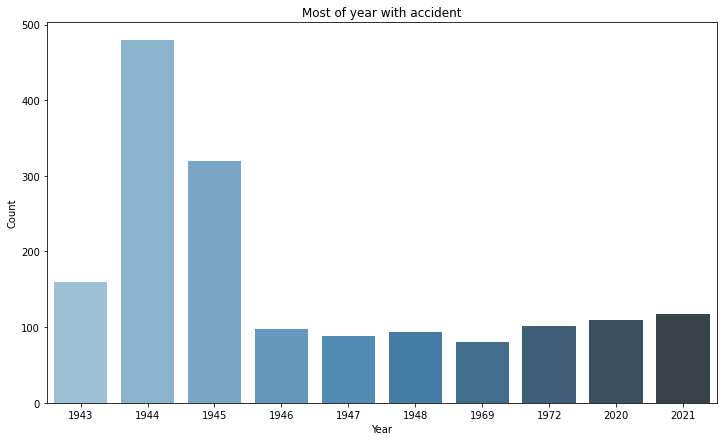

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=yv.index[:10], y=yv.values[:10], palette="Blues_d").set(title='Most of year with accident') #plot 
plt.xlabel('Year')
plt.ylabel('Count')

In [ ]:
yna = result['Aircaft_Nature'].value_counts() #นับจำนวนประเภทของเครื่องบินที่เกิดอุบัติเหตุ
yna[:10]

Commercial           2006
Military             1675
Unknown               630
Cargo                 424
Ferry/positioning     114
Executive              78
Training               70
Private                58
Test                   49
Illegal Flight         41
Name: Aircaft_Nature, dtype: int64

Text(0, 0.5, 'Count')

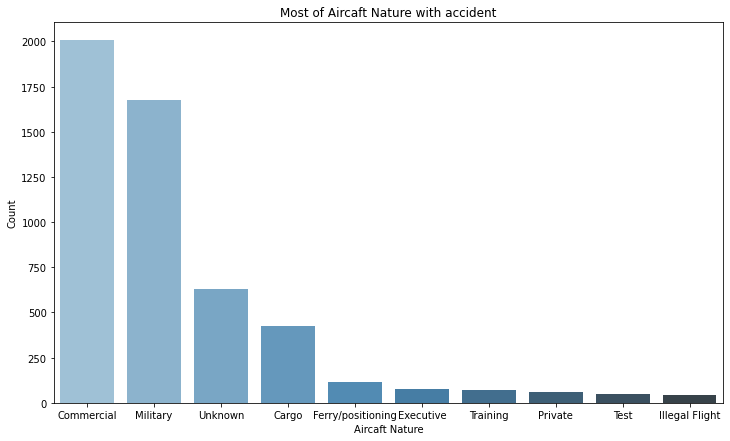

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=yna.index[:10], y=yna.values[:10], palette="Blues_d").set(title='Most of Aircaft Nature with accident')
plt.xlabel('Aircaft Nature')
plt.ylabel('Count')

In [ ]:
re = result['region'].value_counts() #นับจำนวนทวีปของอุบัติเหตุที่เกิดขึ้น
re

Americas    1725
Europe      1473
Asia        1373
Africa       531
Oceania      176
Name: region, dtype: int64

Text(0, 0.5, 'Count')

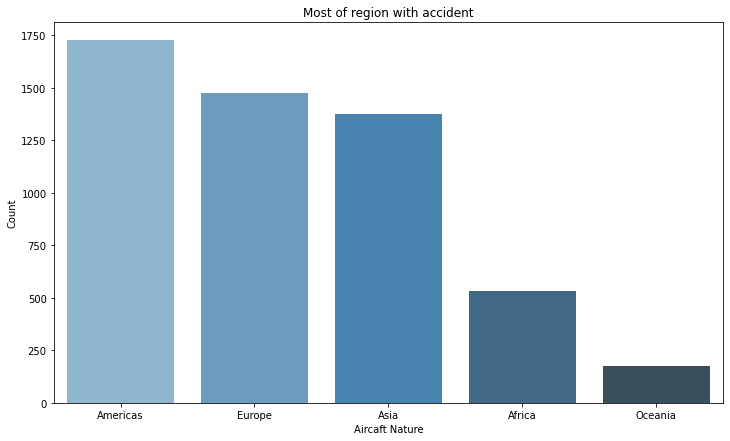

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=re.index, y=re.values, palette="Blues_d").set(title='Most of region with accident')
plt.xlabel('Aircaft Nature')
plt.ylabel('Count')

In [ ]:
#export data
result.to_csv("concat_data.csv")